<a href="https://colab.research.google.com/github/alvaro21c/Laboratorio-2023-1/blob/main/Laboratorio15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=7dfd2e12fa849d85f03dbc2ad817e92bc4832e211d1659ab145d56d4c2093c73
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [ ]:
# Librerias para la clase
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc, col, max, struct
import matplotlib.pyplot as plt

In [ ]:
# Crear la sesion de Spark
spark=SparkSession.builder.appName('spark_app').getOrCreate()


In [ ]:
link1='/content/drive/MyDrive/Laboratorio 2023-1/listenings.csv'
link2='/content/drive/MyDrive/Laboratorio 2023-1/genre.csv'

df1=spark.read.format('csv').option('inferSchema',True).option('header',True).load(link1)



In [ ]:
df1.show()

+-----------+-------------+--------------------+---------------+--------------------+
|    user_id|         date|               track|         artist|               album|
+-----------+-------------+--------------------+---------------+--------------------+
|000Silenced|1299680100000|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|1299679200000|            Acapella|          Kelis|            Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|1297511400000|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|1294498440000|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|1292438340000|               ObZen|      Meshuggah|               ObZen|
|000Silenced|1292437740000|   Yama's Messengers|      

In [ ]:
df1=df1.drop('date')
df1.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

In [ ]:
dimensiones=(df1.count(),len(df1.columns))
dimensiones

(14650594, 4)

In [ ]:
df1=df1.na.drop()
dimensiones=(df1.count(),len(df1.columns))
dimensiones


(13758905, 4)

In [ ]:
df1.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



In [ ]:
#seleccionar dos columnas
a=df1.select('artist','track')
a.show()

+---------------+--------------------+
|         artist|               track|
+---------------+--------------------+
|       Jessie J|           Price Tag|
|       Jessie J|Price Tag (Acoust...|
|          Robyn|Be Mine! (Ballad ...|
|          Kelis|            Acapella|
|      The Tease|   I'm Not Invisible|
|       MSTRKRFT|Bounce (Feat NORE...|
|        Rihanna|Don't Stop The Mu...|
|      Meshuggah|               ObZen|
|         Gojira|   Yama's Messengers|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|        In Deference|
|    Decapitated|      Post(?)organic|
|   Dom & Roland|        Mind Feeders|
|Cannibal Corpse|Necrosadistic War...|
|   Dom & Roland|     Dance All Night|
|   Dom & Roland|          Late Night|
|   Dom & Roland|          Freak Seen|
|   Dom & Roland|Paradrenasite (Hi...|
|   Dom & Roland|               Rhino|
+---------------+--------------------+
only showing top 20 rows



In [ ]:
# Elegir aquellos usuarios que han escuchado Gorillaz
b=df1.select('*').filter(df1.artist == 'Gorillaz')
b.show()


+----------+--------------------+--------+-------------+
|   user_id|               track|  artist|        album|
+----------+--------------------+--------+-------------+
|01higginsr|    Orchestral Intro|Gorillaz|Plastic Beach|
|01higginsr|Fire Coming Out o...|Gorillaz|   Demon Days|
|01kaputnik|         Dirty Harry|Gorillaz|   Demon Days|
|01kaputnik|       O Green World|Gorillaz|   Demon Days|
|01kaputnik|      Kids With Guns|Gorillaz|   Demon Days|
|01kaputnik|           El Mañana|Gorillaz|   Demon Days|
|01kaputnik|       Feel Good Inc|Gorillaz|   Demon Days|
|    15step|          Demon Days|Gorillaz|   Demon Days|
|    15step|Don't Get Lost in...|Gorillaz|   Demon Days|
|    15step|Fire Coming Out o...|Gorillaz|   Demon Days|
|    15step|                DARE|Gorillaz|   Demon Days|
|    15step|         White Light|Gorillaz|   Demon Days|
|    15step|           All Alone|Gorillaz|   Demon Days|
|    15step|   November Has Come|Gorillaz|   Demon Days|
|    15step|Every Planet We R..

In [ ]:
dimensiones=(b.count(),len(b.columns))
dimensiones

(14731, 4)

In [ ]:
c=df1.select('user_id').filter(df1.artist=='Arctic Monkeys').groupby('user_id').agg(count('user_id').alias('total')).orderBy(desc('total')).limit(10)
c.show()

+--------------+-----+
|       user_id|total|
+--------------+-----+
|BonjourItsFran|  200|
|        yamsta|  189|
|    oliviarghh|  174|
|   JamiePricee|  156|
|        Lukisz|  155|
|    AshandCoke|  153|
|   LittleHiggy|  144|
|         iradm|  142|
|    joeyjarman|  141|
|        mazopn|  133|
+--------------+-----+



In [ ]:
d=df1.select('artist','track').groupby('artist','track').agg(count('*').alias('Top10')).orderBy(desc('Top10')).limit(10)
d.show()

+--------------+----------------+-----+
|        artist|           track|Top10|
+--------------+----------------+-----+
| Justin Bieber|           Sorry| 3381|
|Arctic Monkeys|Do I Wanna Know?| 2865|
|      Bon Iver|     Skinny Love| 2836|
|          Zayn|      PILLOWTALK| 2701|
|   The Killers|   Mr Brightside| 2690|
|       Rihanna|            Work| 2646|
|      Bastille|         Pompeii| 2606|
|Mumford & Sons| Little Lion Man| 2520|
|Mumford & Sons|        The Cave| 2485|
| Justin Bieber|   Love Yourself| 2481|
+--------------+----------------+-----+



In [ ]:
e=df1.select('artist','track').filter(df1.artist == 'Rihanna').groupby('artist','track').agg(count('*').alias('Top10/Rihanna')).orderBy(desc('Top10/Rihanna')).limit(10)
e.show()

+-------+--------------------+-------------+
| artist|               track|Top10/Rihanna|
+-------+--------------------+-------------+
|Rihanna|                Work|         2646|
|Rihanna|Only Girl (In the...|         1749|
|Rihanna|We Found Love (fe...|         1575|
|Rihanna|                 S&M|         1307|
|Rihanna|            Rude Boy|         1303|
|Rihanna|            Diamonds|         1224|
|Rihanna|      Kiss it Better|          945|
|Rihanna| Where Have You Been|          844|
|Rihanna|Cheers (Drink to ...|          697|
|Rihanna|           Needed Me|          679|
+-------+--------------------+-------------+



In [ ]:
# calcular el top 10 de albums mas escuchados

In [ ]:
df2=spark.read.format('csv').option('inferSchema',True).option('header',True).load(link2)

In [ ]:
df2.show()

+--------------------+-----+
|              artist|genre|
+--------------------+-----+
|                Muse| rock|
|             Nirvana| rock|
|            Bon Jovi| rock|
|          The Police| rock|
|                Kiss| rock|
|       Guns N' Roses| rock|
|         Rusted Root| rock|
|Katrina and the W...|  pop|
|         The Beatles| rock|
|        Hall & Oates|  pop|
|        Otis Redding| soul|
|         Marvin Gaye| soul|
|     The Cranberries| rock|
|            Survivor| rock|
|       Fleetwood Mac|blues|
|           Radiohead| rock|
|                Toto| rock|
|                  U2| rock|
|Creedence Clearwa...| rock|
|                 REM| rock|
+--------------------+-----+
only showing top 20 rows



In [ ]:
df = df1.join(df2,how='inner',on=['artist'])

In [ ]:
df.show()

+------------+-----------+--------------------+--------------------+--------------------+
|      artist|    user_id|               track|               album|               genre|
+------------+-----------+--------------------+--------------------+--------------------+
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Ariana Grande & ...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are|                 pop|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Ariana Grande & ...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag|                 pop|
|       Ro

In [ ]:
f=df.select('user_id').filter(df.genre=='hip hop').groupby('user_id').agg(count('*').alias(
    'Top10')).orderBy(desc('Top10')).limit(10)
f.show()

+-------------+-----+
|      user_id|Top10|
+-------------+-----+
|mydearbrielle|  400|
|        enrow|  320|
|elektraboogie|  268|
|     JWClinch|  261|
|  GarthVeeder|  234|
|   keirlawson|  218|
|        Jad0x|  200|
|   onemeanhat|  200|
|SeriousSteven|  198|
|         cbum|  197|
+-------------+-----+



In [ ]:
g=df.select('genre').groupby('genre').agg(count('*').alias('Top10')).orderBy(
    desc('Top10')).limit(10)
g.show()

+----------+-------+
|     genre|  Top10|
+----------+-------+
|      rock|2691934|
|       pop|1544747|
|electronic| 551509|
|   hip hop| 532984|
|      folk| 438174|
|indie rock| 431439|
|      punk| 380915|
|       r&b| 344101|
|     metal| 208107|
|     indie| 206726|
+----------+-------+



In [ ]:
h1=df.select('user_id','genre').groupby('user_id','genre').agg(
    count('*').alias('Total')).orderBy('user_id')
h1.show()

+-------+--------------------+-----+
|user_id|               genre|Total|
+-------+--------------------+-----+
| --Seph| Boston Pops Orch...|    1|
| --Seph|               Bjorn|    8|
| --Seph|                 pop|    9|
| --Seph| brazilian pop music|    1|
| --Seph|          Nils Frahm|    1|
| --Seph| Snoop Dogg & Dev...|    4|
| --Seph|               dance|    1|
| --Seph|        instrumental|    1|
| --Seph|  progressive trance|    1|
| --Seph|   Vladimir Spivakov|    1|
| --Seph|          Thom Yorke|    2|
| --Seph|               samba|    2|
| --Seph|               Ruben|    4|
| --Seph|             ambient|    6|
| --Seph|           classical|   31|
| --Seph| Sara Mingardo & ...|    1|
| --Seph|               indie|    3|
| --Seph|             baroque|    1|
| --Seph|         heavy metal|    1|
| --Seph|     Hilko Schomerus|    1|
+-------+--------------------+-----+
only showing top 20 rows



In [ ]:
h2=h1.groupby('user_id').agg(max(struct(col('Total'),col('genre'))).alias(
    'max')).select(col('user_id'),col('max.genre'))
h2.show()

+---------------+-----------+
|        user_id|      genre|
+---------------+-----------+
|      --Shinn--|       rock|
|       --ollz--|       rock|
|     -Amnesiac-|      metal|
|         -Bish-|       rock|
|        -Danni-|       rock|
|          -DeWp|    hip hop|
|      -Faction-|       rock|
|-February-Star-|       rock|
|        -Gemma-|british pop|
|   -Gingergirl-|        pop|
|        -Hazel-|   synthpop|
|        -Heiko-| electronic|
|         -Katie|      lo-fi|
|      -Krystal-|       rock|
|         -Mark-| indie rock|
|       -Mullet-|  metalcore|
|          -Robs|       rock|
| -SleepingStar-|black metal|
|      -Stifler-|       rock|
|  -Toxic-Waste-|  aggrotech|
+---------------+-----------+
only showing top 20 rows



In [ ]:
i=df2.select('genre').filter((col('genre')=='pop')|(col('genre')== 'rock') |
                             (col('genre')=='hip hop')| (col('genre')=='metal')).groupby(
                             'genre').agg(count('genre').alias('Total'))
i.show()

+-------+-----+
|  genre|Total|
+-------+-----+
|    pop| 6960|
|hip hop| 4288|
|  metal| 1854|
|   rock| 9066|
+-------+-----+



In [ ]:
x=i.collect()
x

[Row(genre='pop', Total=6960),
 Row(genre='hip hop', Total=4288),
 Row(genre='metal', Total=1854),
 Row(genre='rock', Total=9066)]

In [ ]:
labels=[row['genre'] for row in x]
total=[row['Total'] for row in x]

print(labels)
print(total)


['pop', 'hip hop', 'metal', 'rock']
[6960, 4288, 1854, 9066]


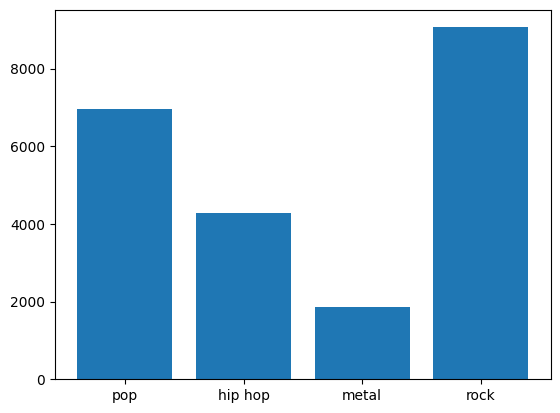

In [ ]:
plt.bar(labels,total)
plt.show()